In [756]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import warnings
warnings.filterwarnings("ignore")

In [1128]:
!gitpush

[main aca7619] initial commit
 1 file changed, 1180 insertions(+), 56 deletions(-)
Counting objects: 5, done.
Delta compression using up to 28 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 3.07 KiB | 0 bytes/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To git@github.com:ghossh/Bay_of_bengal_02_hpc.git
   d928b75..aca7619  main -> main


In [3]:
## Data variable rename 
def name_ch(input_data):
    #lon=input_data.dims[2]
    #lat=input_data.dims[1]
    #time=input_data.dims[0]
    input_data=input_data.rename({'lat':'latitude'})
    input_data=input_data.rename({'lon':'longitude'})
    input_data=input_data.rename({'time':'time'})
    return input_data

In [863]:
def time_set(data):
    tim=pd.date_range("1-2-1991", periods=len(data.time))
    tim_da = xr.DataArray(tim,[('time',tim)])
    data['time']=tim_da
    return data
def sla_cal(data):
    data['sl']=data.pn/980
    clim=data.sl.sel(time=slice('2000-01-01','2019-12-31')).mean('time')
    data['sla']=data.sl-clim
    data=data.sla
    data=data.where(data<1000)
    data=data.where(data!=0,np.nan)
    data=data.sel(time=slice('1993-01-01','2019-12-31'))
    #data=data.where(data>0.0001)
    return data
def data_proc(data):
    #data=data.pn
    data=name_ch(data)
    data=time_set(data)
    data=sla_cal(data)
    return data

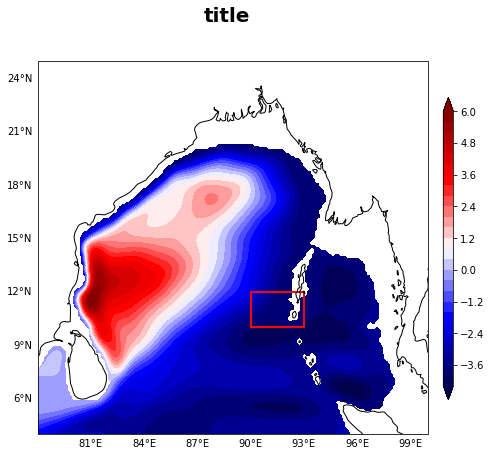

In [753]:
def plot(input_data,save):
    lon=input_data[input_data.dims[1]].data
    lat=input_data[input_data.dims[0]].data
    #axs=axs.flatten()
    L2=[-.6,-.5,-.4,-.3,-.2,-.1,-.05,0,.05,.1,.2,.3,.4,.5,.6]
    fig, axs = plt.subplots(nrows=1,ncols=1,subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(7,7))
    cs=axs.contourf(lon,lat,input_data,levels=30,transform = ccrs.PlateCarree(),cmap='seismic',extend='both')
    #axs.setextent([78,100,4,25])
    #axs[1].set_title(year,fontsize = 15, weight='bold')
    axs.coastlines()
    
    axs.add_patch(Rectangle((90,10),3,2,linewidth=2,edgecolor='r',facecolor='none'))
    gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0,)
    gl.top_labels = False
    gl.bottom_labels = True
    gl.right_labels = False
    gl.left_labels = True
    cb_ax=fig.add_axes([0.93,0.2,0.02,0.6])
    cba=fig.colorbar(cs,cax=cb_ax)

    plt.suptitle('title',fontsize = 20,weight='bold')
    plt.savefig(save,dpi=120)
    return

plot(BoB_LCSBI_low[100],'save.jpg')

In [701]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#define Matplotlib figure and axis
fig, ax = plt.subplots()

#create simple line plot
BoB_LCSEIO_low[100].

#add rectangle to plot
ax.add_patch(Rectangle((1, 1), 2, 6))

#display plot
plt.show()

SyntaxError: invalid syntax (2877875979.py, line 8)

In [6]:
def BoB_plot(input_data,title,output):
########## Data ########
    #input_data=input_data.rename({input_data.dims[0]:'time'})
    datasets={}
    for i in range(1995,2019):
        summer_unfiltered=input_data.sel(time=slice(repr(i)+'-06-01',repr(i)+'-08-31')).mean(dim='time')
        datasets[i]=[]
        datasets[i].append(summer_unfiltered)
    lon=input_data.longitude.data
    lat=input_data.latitude.data
########## Info ######
    Summer_enso_info={}
    Summer_enso_info=dict({1993:None,1994:'ME, ONI:0.4',1995:'ML, ONI:-0.2',1996: None,1997:'VSE, ONI:1.6',
                        1998:'SL, ONI:-0.8',1999:'SL, ONI:-1.1',2000:'WL, ONI:-0.6',2001:None,2002:'ME, ONI:0.8',
                        2003:None,2004:'WE, ONI:0.5',2005:'WL, ONI:-0.1',2006:'WE, ONI:0.1',2007:'SL, ONI:-0.5',
                        2008:'WL, ONI:-0.4',2009:'ME, ONI:0.5',2010:'SL, ONI:-1.0',2011:'ML, ONI:-0.5',2012:None,
                        2013:None,2014:'WE, ONI:0.1',2015:'VSE, ONI:1.5',2016:'WL, ONI:-0.4',2017:'WL, ONI:0.1',
                        2018:'WE, ONI:0.1',2019:None,2020:'ML, ONI:-0.4',2021:'ML, ONI:-0.4'})

    Elnino_years=[1994,1997,2002,2004,2006,2009,2014,2015,2018]
    Lanina_years=[1995,1998,1999,2000,2005,2007,2008,2010,2011,2016,2017,2020,2021]
##########  Plotting ###########
    fig, axs = plt.subplots(nrows=5,ncols=5,subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(15,12))
    axs=axs.flatten()
    y_label=set([0,5,10,15,20])
    x_label=set([20,21,22,23,24])
    L1=[-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9]
    L2=[-15,-12.5,-10,-7.5,-5,-2.5,0,2.5,5,7.5,10,12.5,15]
    for i,year in enumerate(datasets):
            data=datasets[year]
            cs=axs[i].contourf(lon,lat,data[0],
                              levels=L1,transform = ccrs.PlateCarree(),
                              cmap='seismic',extend='both')
            axs[i].set_extent([78,100,4,25])
            axs[i].set_title(year,fontsize = 15, weight='bold')
            #axs[i].add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
            axs[i].coastlines()
            if i in y_label:
                gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0,)
                gl.top_labels = False
                gl.bottom_labels = False
                gl.right_labels = False
                #gl.xlines=False
            if i in x_label:
                gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0,)
                gl.top_labels = False
                gl.left_labels = False
                gl.right_labels = False
            if year in Elnino_years:
                axs[i].text(88,23.5, Summer_enso_info[year],color='red', fontsize = 9,weight='bold')
            if year in Lanina_years:
                axs[i].text(88,23.5, Summer_enso_info[year],color='blue', fontsize = 9,weight='bold')

    cb_ax=fig.add_axes([0.93,0.2,0.02,0.6])
    cba=fig.colorbar(cs,cax=cb_ax)
    plt.suptitle(title,fontsize = 30,weight='bold')
    plt.savefig(output,dpi=120)
    
    return 



## Filtering code ------------------

In [1112]:
import scipy.signal as signal
def butterworth_lowpass_filter(data, cutoff_time, axis=0):
    cutoff_freq=1/cutoff_time
    nyfreq=cutoff_freq*2
    order=4
    B, A = signal.butter(order, nyfreq, output="ba")
    return signal.filtfilt(B, A, data, axis=0)

def filter_data(data):
    data_low = butterworth_lowpass_filter(data, 400)
    data_low=xr.DataArray(data_low,coords={"time": data.time, "latitude": data.latitude,
                              "longitude": data.longitude},name=str('sla_low'),
                      dims=["time", "latitude","longitude"])
    return data_low

# Altimeter Raw

In [8]:
BoB_altimeter_raw=xr.open_mfdataset("/home/NCAOR/supriyog/raw_data/SL_no_anom/global_SL_and_current_93_19.nc"
                                 ).sel(latitude=slice(4,25),longitude=slice(78,100)).sla

clim=BoB_altimeter_raw.sel(time=slice('2000-01-01','2019-12-30')).mean('time')


In [1063]:
BoB_altimeter

<xarray.DataArray 'sla' (time: 9672, latitude: 84, longitude: 88)>
dask.array<mul, shape=(9672, 84, 88), dtype=float64, chunksize=(9672, 84, 88), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-30
  * longitude  (longitude) float32 78.12 78.38 78.62 78.88 ... 99.38 99.62 99.88
  * latitude   (latitude) float32 4.125 4.375 4.625 4.875 ... 24.38 24.62 24.88

# Altimeter Unfiltered

In [54]:
BoB_altimeter1=xr.open_mfdataset('/home/NCAOR/supriyog/raw_data/SL_anomaly/IO_SLA_v2021.nc',autoclose=True).sel(latitude=slice(4,25),longitude=slice(78,100)).sla

In [9]:
BoB_altimeter=(BoB_altimeter_raw-clim)*100


In [ ]:
#BoB_altimeter=name_ch(BoB_altimeter)

In [11]:
BoB_altimeter_new=xr.open_mfdataset('BoB_altimeter_new.nc').sla

('time', 'latitude', 'longitude')


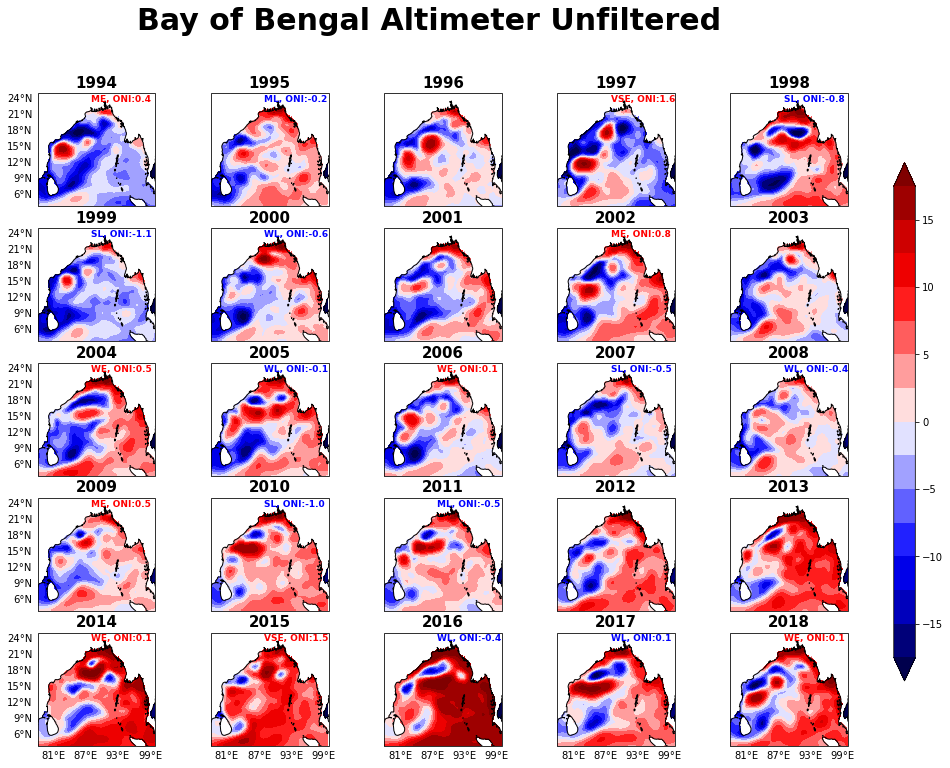

In [43]:
i=BoB_altimeter_new
print(i.dims)
i=name_ch(i)
BoB_plot(i,"Bay of Bengal Altimeter Unfiltered",'BoB_altimeter_unfiltered.jpg')

# LCS Unfilltered data import

In [17]:
lcs_path='/home/NCAOR/supriyog/raw_data/LCSCR_model_output/LCSCR_run_by_supi/LCS_ERA5/'
BoB_LCSCR=xr.open_dataset(lcs_path+'LCSCR_final_era5.nc',autoclose=True
                         ).sel(lat=slice(4,25),lon=slice(78,100))
#BoB_LCSCR=BoB_LCSCR.rename({'lon':'longitude'})
#BoB_LCSCR=BoB_LCSCR.rename({'lat':'latitude'})
BoB_LCSCR.dims

Frozen({'lon': 221, 'lat': 211, 'time': 10957})

### LCS Expt data

In [864]:
BoB_LCSCR=xr.open_mfdataset(lcs_path+'LCSCR_final_era5.nc' ).sel(lat=slice(4,25),lon=slice(78,100))
BoB_LCSBI=xr.open_mfdataset(lcs_path+'LCSBI.nc').sel(lat=slice(4,25),lon=slice(78,100))
BoB_LCSEB=xr.open_mfdataset(lcs_path+'LCSEB.nc').sel(lat=slice(4,25),lon=slice(78,100))
BoB_LCSWB=xr.open_mfdataset(lcs_path+'LCSWB.nc').sel(lat=slice(4,25),lon=slice(78,100))
BoB_LCSEIO=xr.open_mfdataset(lcs_path+'LCSEIO.nc').sel(lat=slice(4,25),lon=slice(78,100))



In [865]:
BoB_LCSCR=data_proc(BoB_LCSCR)
BoB_LCSBI=data_proc(BoB_LCSBI)
BoB_LCSEB=data_proc(BoB_LCSEB)
BoB_LCSWB=data_proc(BoB_LCSWB)
BoB_LCSEIO=data_proc(BoB_LCSEIO)

In [868]:
BoB_LCSEIO[100].plot()

KeyboardInterrupt: 

In [870]:
path='./datasets/unfiltered/'
BoB_altimeter.to_netcdf(path+'BoB_altimeter.nc')
BoB_LCSCR.to_netcdf(path+'BoB_LCSCR.nc')
BoB_LCSBI.to_netcdf(path+'BoB_LCSBI.nc')
BoB_LCSEB.to_netcdf(path+'BoB_LCSEB.nc')
BoB_LCSWB.to_netcdf(path+'BoB_LCSWB.nc')
BoB_LCSEIO.to_netcdf(path+'BoB_LCSEIO.nc')

PermissionError: [Errno 13] Permission denied: b'/home/NCAOR/supriyog/files/p2_Bay_of_bengal_02_hpc/datasets/unfiltered/BoB_altimeter.nc'

# LCSCR unfilter plot

# Data Filtering

In [1114]:
BoB_altimeter_low = filter_da./datasets/ltimeter)
BoB_LCSCR_low = filter_data(BoB_LCSCR)
BoB_LCSWB_low = filter_data(BoB_LCSWB)
BoB_LCSEB_low = filter_data(BoB_LCSEB)
BoB_LCSBI_low = filter_data(BoB_LCSBI)
BoB_LCSEIO_low = filter_data(BoB_LCSEIO)



In [1127]:
!ls -l ./datasets/filtered
!pwd

total 18521124
-rw-r----- 1 supriyog ncaor  572022787 Oct  9 23:04 400dayslow_altimeter.nc
-rw-r----- 1 supriyog ncaor 3678715339 Oct  9 23:08 400dayslow_BI_LCSCR.nc
-rw-r----- 1 supriyog ncaor 3678715339 Oct  9 23:09 400dayslow_EB_LCSCR.nc
-rw-r----- 1 supriyog ncaor 3678715339 Oct  9 23:08 400dayslow_EIO_LCSCR.nc
-rw-r----- 1 supriyog ncaor 3678715339 Oct  9 23:05 400dayslow_LCSCR.nc
-rw-r----- 1 supriyog ncaor 3678715339 Oct  9 23:08 400dayslow_WB_LCSCR.nc
/home/NCAOR/supriyog/files/p2_Bay_of_bengal_02_hpc


In [1121]:
/home/NCAOR/supriyog/files/p2_Bay_of_bengal_02_hpc/datasets/filtered/400dayslow_*_LCSCR*

In [1125]:
BoB_altimeter_low.to_netcdf("./datasets/filtered/400dayslow_altimeter.nc")
BoB_LCSCR_low.to_netcdf("./datasets/filtered/400dayslow_LCSCR.nc")
BoB_LCSBI_low.to_netcdf("./datasets/filtered/400dayslow_BI_LCSCR.nc")
BoB_LCSWB_low.to_netcdf("./datasets/filtered/400dayslow_WB_LCSCR.nc")
BoB_LCSEIO_low.to_netcdf("./datasets/filtered/400dayslow_EIO_LCSCR.nc")
BoB_LCSEB_low.to_netcdf("./datasets/filtered/400dayslow_EB_LCSCR.nc")


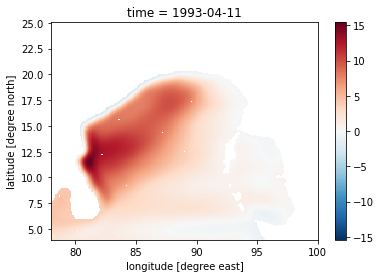

In [872]:
x=BoB_LCSCR_low[100]
x.plot()

<xarray.DataArray 'sla_low' (time: 9861, latitude: 211, longitude: 221)>
array([[[4.7047693 , 4.58090985, 4.4675692 , ...,        nan,
                nan,        nan],
        [4.8083157 , 4.68329545, 4.56964806, ...,        nan,
                nan,        nan],
        [4.95712164, 4.83294518, 4.72047643, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[4.6780196 , 4.55459483, 4.44151358, ...,        nan,
                nan,        nan],
        [4.7826864 , 4.65812936, 4.54475534, ...,        nan,
                nan,        nan],
        [4.9324685 , 4.80878082, 4.69660269, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[3.36499672, 3.37119302, 3.37922377, ...,        nan,
                nan,        nan],
        [3.27176532, 3.27702811, 3.28434491, ...,        nan,
                nan,        nan],
        [3.15514221, 3.15806534, 3.16309585, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * latitude   (latitude) float32 4.0 4.1 4.2 4.3 4.4 ... 24.7 24.8 24.9 25.0
  * longitude  (longitude) float32 78.0 78.1 78.2 78.3 ... 99.7 99.8 99.9 100.0

In [678]:
x=BoB_LCSEIO_low[100]
x.sel(latitude=24,longitude=87)

<xarray.DataArray ()>
array(0.)
Coordinates:
    time       datetime64[ns] 1993-04-11
    latitude   float32 24.0
    longitude  float32 87.0

In [ ]:
BoB_LCSEIO_low[100].plot()


In [1110]:
BoB_LCSEIO_low

<xarray.DataArray (time: 9861, latitude: 211, longitude: 221)>
array([[[ 2.5763825 ,  2.60480166,  2.63776797, ...,         nan,
                 nan,         nan],
        [ 2.49074634,  2.51892192,  2.55215413, ...,         nan,
                 nan,         nan],
        [ 2.43000766,  2.45796294,  2.49128412, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 2.55146192,  2.57950147,  2.61203903, ...,         nan,
                 nan,         nan],
        [ 2.46651285,  2.49430184,  2.52709348, ...,         nan,
                 nan,         nan],
        [ 2.40635784,  2.43392003,  2.46679014, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-1.87142237, -1.86316419, -1.85474966, ...,         nan,
                 nan,         nan],
        [-1.90521486, -1.89693072, -1.88837632, ...,         nan,
                 nan,         nan],
        [-1.94289137, -1.93471324, -1.92626793, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * latitude   (latitude) float32 4.0 4.1 4.2 4.3 4.4 ... 24.7 24.8 24.9 25.0
  * longitude  (longitude) float32 78.0 78.1 78.2 78.3 ... 99.7 99.8 99.9 100.0

In [298]:
LCSEIO_low = butterworth_lowpass_filter(BoB_LCSEIO, 400)

LCSEIO_low=xr.DataArray(LCSEIO_low,coords=
                                   {"time": BoB_LCSEIO.time, "latitude": BoB_LCSEIO.latitude,
                          "longitude": BoB_LCSEIO.longitude},
                  dims=["time", "latitude","longitude"])
LCSEIO_low['sla_low']=LCSEIO_low
LCSEIO_low=LCSEIO_low.sla_low

## Altimeter filtering in python

In [128]:
BoB_altimeter_low = butterworth_lowpass_filter(BoB_altimeter_new, 400)

BoB_altimeter_low=xr.DataArray(BoB_altimeter_low,coords=
                                   {"time": BoB_altimeter_new.time, "latitude": BoB_altimeter_new.latitude,
                          "longitude": BoB_altimeter_new.longitude},
                  dims=["time", "latitude","longitude"])
BoB_altimeter_low['sla_low']=BoB_altimeter_low
BoB_altimeter_low=BoB_altimeter_low.sla_low

('time', 'latitude', 'longitude')


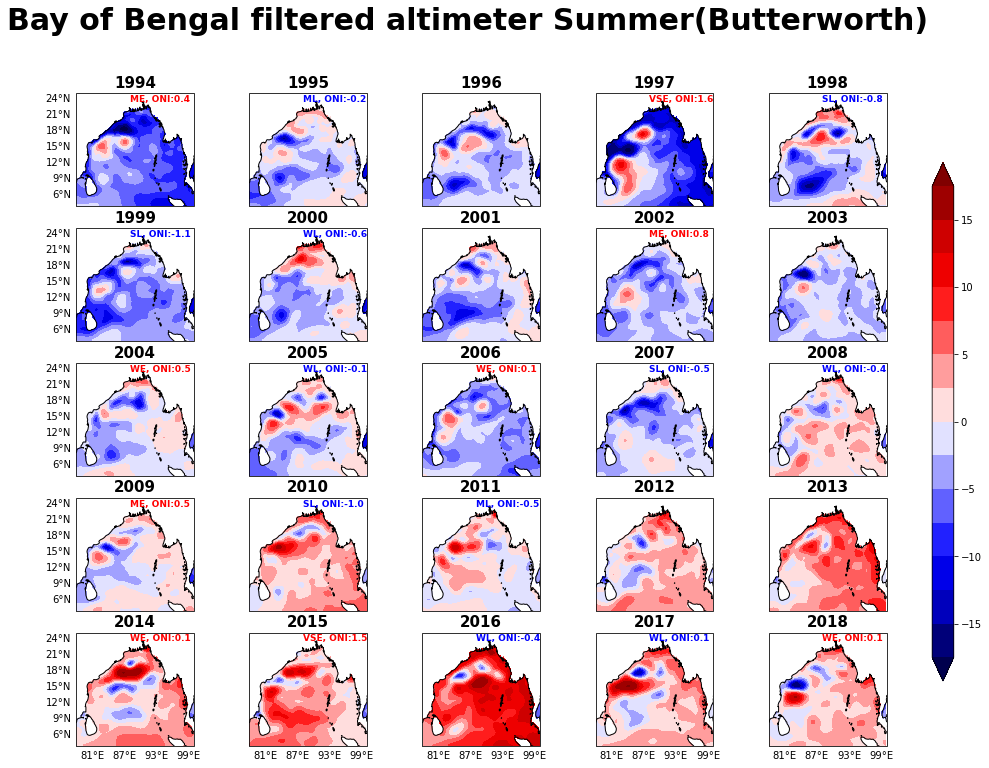

In [16]:
i=BoB_altimeter_low
print(i.dims)
BoB_plot(i,"Bay of Bengal filtered altimeter Summer(Butterworth)",
         'BoB_filtered_altimeter.jpg')

# LCS Filtered

In [138]:

BoB_LCSCR_low=xr.DataArray(BoB_LCSCR_low,coords={"time": BoB_LCSCR.time, "latitude": BoB_LCSCR.latitude,
                          "longitude": BoB_LCSCR.longitude},
                  dims=["time", "latitude","longitude"])

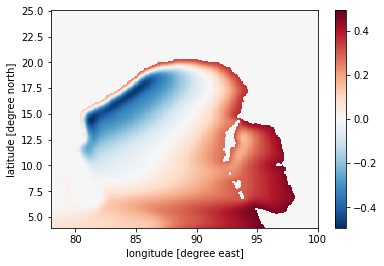

In [312]:
BoB_LCSEIO_low.sel(time=slice('06-01-1998','08-30-2009')).mean(dim='time').plot()

# Correlation & RMSE

In [147]:
obs=xr.open_dataset('./datasets/unfiltered/BoB_altimeter.nc').sla.sel(time=slice('01-01-2000','30-01-2019'))
model=xr.open_dataset('./datasets/unfiltered/BoB_LCSCR_inp.nc').sla.sel(time=slice('01-01-2000','30-01-2019'))

In [148]:
model

<xarray.DataArray 'sla' (time: 6837, latitude: 84, longitude: 88)>
[50539104 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2019-01-30
  * latitude   (latitude) float32 4.125 4.375 4.625 4.875 ... 24.38 24.62 24.88
  * longitude  (longitude) float32 78.12 78.38 78.62 78.88 ... 99.38 99.62 99.88

## Correlation of BoB Altimeter and LCS

In [27]:
## first we need to make the model data as altimeter data
BoB_LCSCR_inp = BoB_LCSCR.interp_like(BoB_altimeter)
BoB_LCSCR_inp=BoB_LCSCR_inp.interp(latitude=BoB_altimeter.latitude, longitude=BoB_altimeter.longitude)


In [33]:
corr_altimter_LCSCR=xr.corr(obs,model,dim='time')


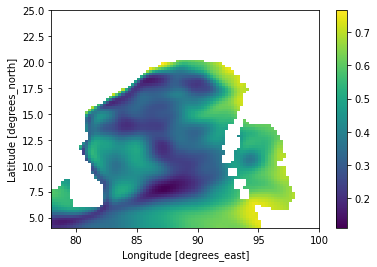

In [228]:
corr_altimter_LCSCR_low.plot()

## Correlation of BoB Altimeter low and LCSCR low

In [36]:
## first we need to make the model data as altimeter data
BoB_LCSCR_low_inp = BoB_LCSCR_low.interp_like(BoB_altimeter_low)
BoB_LCSCR_low_inp=BoB_LCSCR_low_inp.interp(latitude=BoB_altimeter_low.latitude, 
                                       longitude=BoB_altimeter_low.longitude)



In [37]:
corr_altimter_LCSCR_low=xr.corr(BoB_altimeter_low,BoB_LCSCR_low_inp,dim='time')

In [234]:
plot(corr_altimter_LCSCR_low,'Correlation of BoB Altimeter \n Low and LCSCR(NEW) Low',
    'corr_altimter_LCSCR_low.jpg')

TypeError: plot() takes 2 positional arguments but 3 were given

## Correlation of BoB Altimeter low and LCSCR(OLD) low

In [285]:
## first we need to make the model data as altimeter data
BoB_LCSCR_low_old_inp1 = BoB_LCSCR_low_old1.interp_like(BoB_altimeter_low1)
BoB_LCSCR_low_old_inp1=BoB_LCSCR_low_old_inp1.interp(latitude=BoB_altimeter_low1.latitude, 
                                       longitude=BoB_altimeter_low1.longitude)

BoB_LCSCR_low_old_inp1=BoB_LCSCR_low_old_inp1.drop('ZAXIS1_1')

In [286]:
corr_altimter_LCSCR_old_low=xr.corr(BoB_altimeter_low1,BoB_LCSCR_low_old_inp1,dim='time')

In [1099]:
plot(corr_altimter_LCSCR_old_low,'Correlation of BoB Altimeter\n Low and LCSCR(OLD) Low',
    'corr_altimter_LCSCR_low_old.jpg')

NameError: name 'corr_altimter_LCSCR_old_low' is not defined

## RMSE

In [166]:
def rmse(obs, model):
    dat=np.sqrt(((obs - model) ** 2).mean('time'))
    return dat

In [167]:
BoB_rmse=rmse(obs,model)

In [168]:
BoB_rmse_low=rmse(BoB_altimeter_low.sel(time=slice('01-01-2000','30-01-2019')),
                  BoB_LCSCR_low_inp.sel(time=slice('01-01-2000','30-01-2019')))

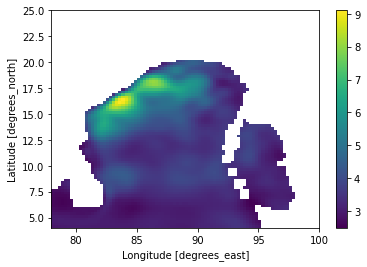

In [680]:
BoB_rmse_low.plot()

## Correlation RMSE Plotm

In [663]:
corr_rmse_data={}
corr_rmse_data={'Correlation between Altimeter & LCSCR':corr_altimter_LCSCR,
                'Correlation between Altimeter & LCSCR Low':corr_altimter_LCSCR_low,
                #'BoB_rmse':BoB_rmse,
                #'BoB_rmse_low':BoB_rmse_low
               }

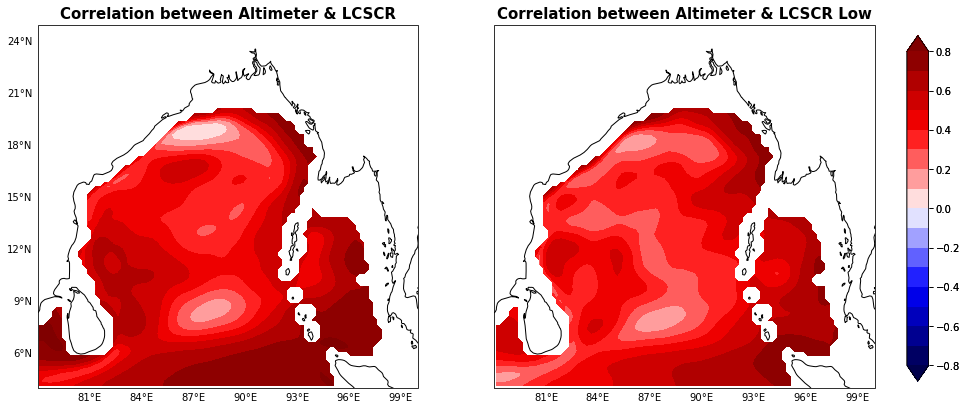

In [1104]:
def corr_rmse_plot(datasets,title,output):
##########  Plotting ###########
    fig, axs = plt.subplots(nrows=1,ncols=2,subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(15,12))
    axs=axs.flatten()
    corr=set([0,1])
    rmse=set([2,3])
    y_label=set([0,6,12,18])
    x_label=set([0,1])
   
    L1=[-.8,-.7,-.6,-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5,.6,.7,.8]
    L2=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    #datasets=clim_data_making(input_data)
    for i,year in enumerate(datasets):
            data=datasets[year]
            if i in corr:
                cs=axs[i].contourf(data.longitude,data.latitude,data,
                                  levels=L1,transform = ccrs.PlateCarree(),
                                  cmap='seismic',extend='both')
                #cs_ax=fig.add_axes([0.93,0.56,0.02,0.3])
                cs_ax=fig.add_axes([0.93,0.3,0.02,0.4])
                cba=fig.colorbar(cs,cax=cs_ax)
            if i in rmse:
                cs=axs[i].contourf(data.longitude,data.latitude,data,
                                  levels=L2,transform = ccrs.PlateCarree(),
                                  cmap='seismic',extend='both')
                #cs_ax=fig.add_axes([0.93,0.15,0.02,0.3])
                
                cba=fig.colorbar(cs,cax=cs_ax)
            
            axs[i].set_extent([78,100,4,25])
            axs[i].set_title(year,fontsize = 15, weight='bold')
            axs[i].coastlines()
            if i in y_label:
                gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0,)
                gl.top_labels = False
                gl.bottom_labels = False
                gl.right_labels = False
                #gl.xlines=False
            if i in x_label:
                gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0,)
                gl.top_labels = False
                gl.left_labels = False
                gl.right_labels = False
           
    
    plt.suptitle(title,fontsize = 30,weight='bold')
    plt.savefig(output,dpi=120)   
    return 
corr_rmse_plot(corr_rmse_data,'','corr_plot.jpg')

# Decadal change

In [873]:
def season_wise_decadal_data(data):
    clim_00_09 =data.sel(time=slice(
        '2000-01-01','2009-12-30')).groupby(
        'time.month').mean(dim='time')

    clim_10_19 =data.sel(time=slice(
        '2010-01-01','2019-12-30')).groupby(
        'time.month').mean(dim='time')

    ### Summer
    summer_00_09_clim=clim_00_09.sel(month=slice(6,8)).mean(dim='month')  
    summer_10_19_clim=clim_10_19.sel(month=slice(6,8)).mean(dim='month') 
    summer_diff=summer_10_19_clim-summer_00_09_clim

    ### Spring
    spring_00_09_clim=clim_00_09.sel(month=slice(3,5)).mean(dim='month')  
    spring_10_19_clim=clim_10_19.sel(month=slice(3,5)).mean(dim='month')   
    spring_diff=spring_10_19_clim-spring_00_09_clim
    
    ### Autumn
    autumn_00_09_clim=clim_00_09.sel(month=slice(9,11)).mean(dim='month')  
    autumn_10_19_clim=clim_10_19.sel(month=slice(9,11)).mean(dim='month')   
    autumn_diff=autumn_10_19_clim-autumn_00_09_clim

    ### Winter
    winter_00_09_clim=clim_00_09.sel(month=[12,1,2]).mean(dim='month')  
    winter_10_19_clim=clim_10_19.sel(month=[12,1,2]).mean(dim='month') 

    winter_diff=winter_10_19_clim-winter_00_09_clim

    datasets={}
    datasets=dict({'spring_00_09_clim':spring_00_09_clim,
               'spring_10_19_clim':spring_10_19_clim,
               'spring_diff':spring_diff,
                'summer_00_09_clim':summer_00_09_clim,
               'summer_10_19_clim':summer_10_19_clim,
               'summer_diff':summer_diff,
                'autumn_00_09_clim':autumn_00_09_clim,
               'autumn_10_19_clim':autumn_10_19_clim,
               'autumn_diff':autumn_diff,
               'winter_00_09_clim':winter_00_09_clim,
               'winter_10_19_clim':winter_10_19_clim,
               'winter_diff':winter_diff,
               'winter_diff':winter_diff})
    return datasets



In [874]:
altimeter_low_decadal_ds=season_wise_decadal_data(BoB_altimeter_low)
LCSCR_low_decadal_ds=season_wise_decadal_data(BoB_LCSCR_low)
LCSWB_low_decadal_ds=season_wise_decadal_data(BoB_LCSWB_low)
LCSEB_low_decadal_ds=season_wise_decadal_data(BoB_LCSEB_low)
LCSEIO_low_decadal_ds=season_wise_decadal_data(BoB_LCSEIO_low)
LCSBI_low_decadal_ds=season_wise_decadal_data(BoB_LCSBI_low)


In [1037]:
LCSBI_low_decadal_ds['winter_00_09_clim']

<xarray.DataArray (latitude: 211, longitude: 221)>
array([[0.17135577, 0.15571683, 0.13836699, ...,        nan,        nan,
               nan],
       [0.26538396, 0.2521336 , 0.23705158, ...,        nan,        nan,
               nan],
       [0.35951678, 0.34943652, 0.33743376, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * latitude   (latitude) float32 4.0 4.1 4.2 4.3 4.4 ... 24.7 24.8 24.9 25.0
  * longitude  (longitude) float32 78.0 78.1 78.2 78.3 ... 99.7 99.8 99.9 100.0

In [1103]:
!rm *pdf

In [ ]:
i=LCSEB_low_decadal_ds['spring_10_19_clim']
j=i.where(i<-0.00000000000001,i>0)
plot(j,'save.jpg')

In [ ]:
p3=[80,85,10,13]
p2=[80,85,14,16]
p1=[85,90,17,21]

## Model Validation

In [876]:
model_validation_dataset={}
model_validation_dataset=dict({'Altimeter_spring_diff':altimeter_low_decadal_ds['spring_diff'],
              'LCSCR_spring_diff':LCSCR_low_decadal_ds['spring_diff'],
               'Altimeter_spring_00_09_clim':altimeter_low_decadal_ds['spring_00_09_clim'],
               'Altimeter_spring_10_19_clim':altimeter_low_decadal_ds['spring_10_19_clim'],
              'LCSCR_spring_00_09_clim':LCSCR_low_decadal_ds['spring_00_09_clim'],
               'LCSCR_spring_10_19_clim':LCSCR_low_decadal_ds['spring_10_19_clim'],
              
              'Altimeter_summer_diff':altimeter_low_decadal_ds['summer_diff'],
              'LCSCR_summer_diff':LCSCR_low_decadal_ds['summer_diff'],
               'Altimeter_summer_00_09_clim':altimeter_low_decadal_ds['summer_00_09_clim'],
              'Altimeter_summer_10_19_clim':altimeter_low_decadal_ds['summer_10_19_clim'],
              'LCSCR_summer_00_09_clim':LCSCR_low_decadal_ds['summer_00_09_clim'],
               'LCSCR_summer_10_19_clim':LCSCR_low_decadal_ds['summer_10_19_clim'],
               
               'Altimeter_autumn_diff':altimeter_low_decadal_ds['autumn_diff'],
              'LCSCR_autumn_diff':LCSCR_low_decadal_ds['autumn_diff'],
               'Altimeter_autumn_00_09_clim':altimeter_low_decadal_ds['autumn_00_09_clim'],
               'Altimeter_autumn_10_19_clim':altimeter_low_decadal_ds['autumn_10_19_clim'],
              'LCSCR_autumn_00_09_clim':LCSCR_low_decadal_ds['autumn_00_09_clim'],
               'LCSCR_autumn_10_19_clim':LCSCR_low_decadal_ds['autumn_10_19_clim'],
               
               'Altimeter_winter_diff':altimeter_low_decadal_ds['winter_diff'],
              'LCSCR_winter_diff':LCSCR_low_decadal_ds['winter_diff'],
               'Altimeter_winter_00_09_clim':altimeter_low_decadal_ds['winter_00_09_clim'],
               'Altimeter_winter_10_19_clim':altimeter_low_decadal_ds['winter_10_19_clim'],
              'LCSCR_winter_00_09_clim':LCSCR_low_decadal_ds['winter_00_09_clim'],
               'LCSCR_winter_10_19_clim':LCSCR_low_decadal_ds['winter_10_19_clim'],
              })

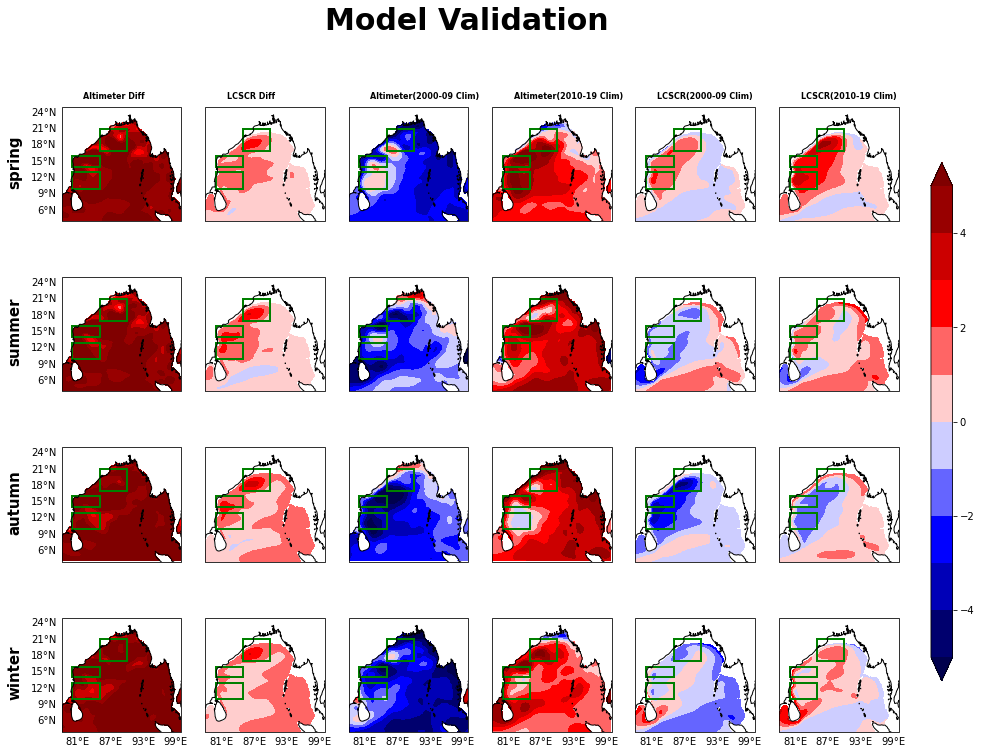

In [1105]:

def model_validation_plot(datasets,title,output):

##########  Plotting ###########
    fig, axs = plt.subplots(nrows=4,ncols=6,subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(15,12))
    axs=axs.flatten()
    y_label=set([0,6,12,18])
    x_label=set([18,19,20,21,22,23])
    #L2=[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
    L2=[-5,-4,-3,-2,-1,0,1,2,3,4,5]
    x_title=['Altimeter Diff','LCSCR Diff','Altimeter(2000-09 Clim)',
             'Altimeter(2010-19 Clim)','LCSCR(2000-09 Clim)',
            'LCSCR(2010-19 Clim)']
    #datasets=clim_data_making(input_data)
    for i,year in enumerate(datasets):
            data=datasets[year]
            cs=axs[i].contourf(data.longitude,data.latitude,data,
                              levels=L2,transform = ccrs.PlateCarree(),
                              cmap='seismic',extend='both')
            axs[i].set_extent([78,100,4,25])
            #axs[i].set_title(year,fontsize = 8, weight='bold')
            axs[i].coastlines()
            axs[i].add_patch(Rectangle((80,10),5,3,linewidth=2,edgecolor='g',facecolor='none'))
            axs[i].add_patch(Rectangle((80,14),5,2,linewidth=2,edgecolor='g',facecolor='none'))
            axs[i].add_patch(Rectangle((85,17),5,4,linewidth=2,edgecolor='g',facecolor='none'))
            
            if i in [0,1,2,3,4,5]:
                axs[i].text(82,27,x_title[i], size=8,weight='bold',verticalalignment='center', rotation=0)
                
            if i in y_label:
                #axs[i].set_title(year[-11:-5], color='k',weight='bold', rotation='vertical',x=-0.3,y=0.3,fontsize = 15)
                axs[i].text(68,15,year[-11:-5], size=15,weight='bold',verticalalignment='center', rotation=90)
                gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0,)
                gl.top_labels = False
                gl.bottom_labels = False
                gl.right_labels = False
                #gl.xlines=False
            if i in x_label:
                gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0,)
                gl.top_labels = False
                gl.left_labels = False
                gl.right_labels = False
           
    cb_ax=fig.add_axes([0.93,0.2,0.02,0.6])
    cba=fig.colorbar(cs,cax=cb_ax)
    plt.suptitle(title,fontsize = 30,weight='bold')
    plt.savefig(output,dpi=120)
    
    return 
model_validation_plot(model_validation_dataset, 'Model Validation', 'validation.jpg')

## Boundary Experiment

In [878]:
def LCSBI_cal(mode):
    lcsbi_data=LCSCR_low_decadal_ds[mode]-(LCSEIO_low_decadal_ds[mode]+
                                          LCSWB_low_decadal_ds[mode]+
                                          LCSEB_low_decadal_ds[mode])
    return lcsbi_data

In [879]:
boundary_expt_dataset={}
boundary_expt_dataset=dict({'LCSCR_spring_diff':LCSCR_low_decadal_ds['spring_diff'],
              'LCSBI_spring_diff':LCSBI_low_decadal_ds['spring_diff'],
              'LCSEIO_spring_diff':LCSEIO_low_decadal_ds['spring_diff'],
                'LCSWB_spring_diff':LCSWB_low_decadal_ds['spring_diff'],
                'LCSEB_spring_diff':LCSEB_low_decadal_ds['spring_diff'],
                
                'LCSCR_summer_diff':LCSCR_low_decadal_ds['summer_diff'],
              'LCSBI_summer_diff':LCSBI_low_decadal_ds['summer_diff'],
              'LCSEIO_summer_diff':LCSEIO_low_decadal_ds['summer_diff'],
                'LCSWB_summer_diff':LCSWB_low_decadal_ds['summer_diff'],
                'LCSEB_summer_diff':LCSEB_low_decadal_ds['summer_diff'],
                            
            'LCSCR_autumn_diff':LCSCR_low_decadal_ds['autumn_diff'],
              'LCSBI_autumn_diff':LCSBI_low_decadal_ds['autumn_diff'],
              'LCSEIO_autumn_diff':LCSEIO_low_decadal_ds['autumn_diff'],
                'LCSWB_autumn_diff':LCSWB_low_decadal_ds['autumn_diff'],
                'LCSEB_autumn_diff':LCSEB_low_decadal_ds['autumn_diff'],
                            
                'LCSCR_winter_diff':LCSCR_low_decadal_ds['winter_diff'],
              'LCSBI_winter_diff':LCSBI_low_decadal_ds['winter_diff'],
              'LCSEIO_winter_diff':LCSEIO_low_decadal_ds['winter_diff'],
                'LCSWB_winter_diff':LCSWB_low_decadal_ds['winter_diff'],
                'LCSEB_winter_diff':LCSEB_low_decadal_ds['winter_diff'],
                            
                           })

In [187]:
boundary_expt_dataset={}
boundary_expt_dataset=dict({'LCSCR_spring_diff':LCSCR_low_decadal_ds['spring_diff'],
              'LCSBI_spring_diff':LCSBI_cal('spring_diff'),
              'LCSEIO_spring_diff':LCSEIO_low_decadal_ds['spring_diff'],
                'LCSWB_spring_diff':LCSWB_low_decadal_ds['spring_diff'],
                'LCSEB_spring_diff':LCSEB_low_decadal_ds['spring_diff'],
                
                'LCSCR_summer_diff':LCSCR_low_decadal_ds['summer_diff'],
              'LCSBI_summer_diff':LCSBI_cal('summer_diff'),
              'LCSEIO_summer_diff':LCSEIO_low_decadal_ds['summer_diff'],
                'LCSWB_summer_diff':LCSWB_low_decadal_ds['summer_diff'],
                'LCSEB_summer_diff':LCSEB_low_decadal_ds['summer_diff'],
                            
            'LCSCR_autumn_diff':LCSCR_low_decadal_ds['autumn_diff'],
              'LCSBI_autumn_diff':LCSBI_cal('autumn_diff'),
              'LCSEIO_autumn_diff':LCSEIO_low_decadal_ds['autumn_diff'],
                'LCSWB_autumn_diff':LCSWB_low_decadal_ds['autumn_diff'],
                'LCSEB_autumn_diff':LCSEB_low_decadal_ds['autumn_diff'],
                            
                'LCSCR_winter_diff':LCSCR_low_decadal_ds['winter_diff'],
              'LCSBI_winter_diff':LCSBI_cal('winter_diff'),
              'LCSEIO_winter_diff':LCSEIO_low_decadal_ds['winter_diff'],
                'LCSWB_winter_diff':LCSWB_low_decadal_ds['winter_diff'],
                'LCSEB_winter_diff':LCSEB_low_decadal_ds['winter_diff'],
                            
                           })

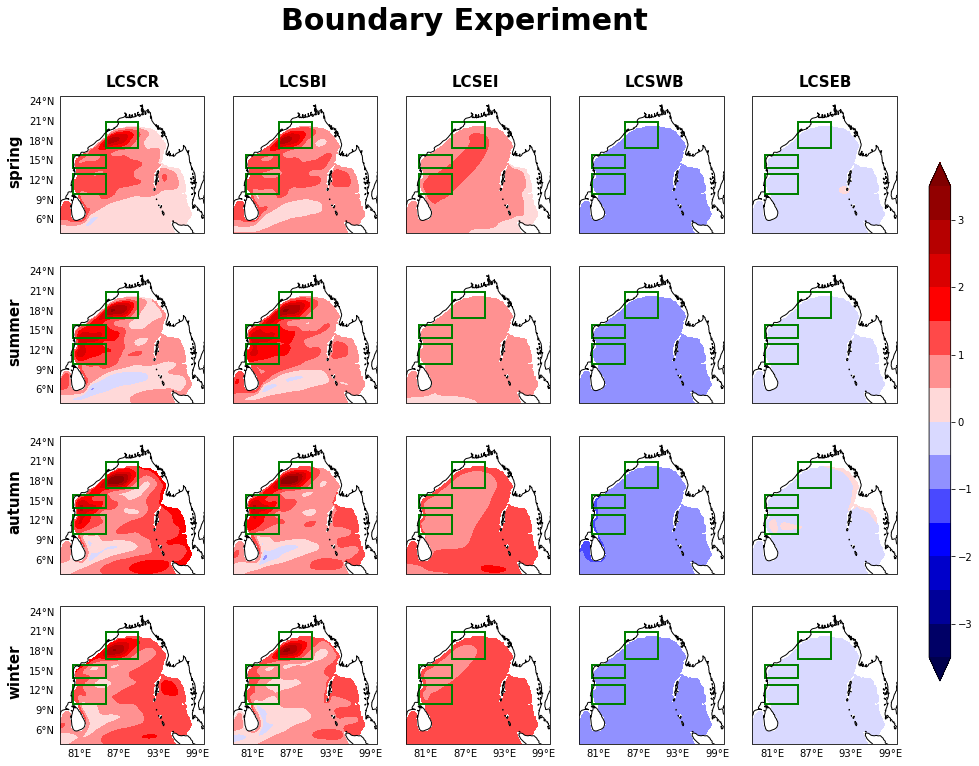

In [1106]:
import cartopy as cart
def boundary_expt_plot(datasets,title,output):

##########  Plotting ###########
    fig, axs = plt.subplots(nrows=4,ncols=5,subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(15,12))
    axs=axs.flatten()
    y_label=set([0,5,10,15])
    x_label=set([15,16,17,18,19])
    #L2=[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
    L2=[-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,.5,1,1.5,2,2.5,3,3.5]
    #datasets=clim_data_making(input_data)
    for i,year in enumerate(datasets):
            data=datasets[year]
            cs=axs[i].contourf(data.longitude,data.latitude,data,
                              levels=L2,transform = ccrs.PlateCarree(),
                              cmap='seismic',extend='both')
            #axs[i].add_feature(cart.feature.LAND, zorder=100, edgecolor='black')
            axs[i].set_extent([78,100,4,25])
            #axs[i].set_title(year,fontsize = 8, weight='bold')
            axs[i].coastlines()
            axs[i].add_patch(Rectangle((80,10),5,3,linewidth=2,edgecolor='g',facecolor='none'))
            axs[i].add_patch(Rectangle((80,14),5,2,linewidth=2,edgecolor='g',facecolor='none'))
            axs[i].add_patch(Rectangle((85,17),5,4,linewidth=2,edgecolor='g',facecolor='none'))
            #axs[1].text(45,30, 'Parabola $Y = x^2$', fontsize = 22)
            #axs[0].set_title('LCSCR', color='k',weight='bold',x=-0.3,y=0.3,fontsize = 15)
            if i in [0,1,2,3,4]:
                axs[i].text(85,27,year[0:5], size=15,weight='bold',verticalalignment='center', rotation=0)
                
            if i in y_label:
                #axs[i].set_title(year[-11:-5], color='k',weight='bold', rotation='vertical',x=-0.3,y=0.3,fontsize = 15)
                axs[i].text(70,15,year[-11:-5], size=15,weight='bold',verticalalignment='center', rotation=90)
                gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0,)
                gl.top_labels = False
                gl.bottom_labels = False
                gl.right_labels = False
                #gl.xlines=False
            if i in x_label:
                gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0,)
                gl.top_labels = False
                gl.left_labels = False
                gl.right_labels = False
           
    cb_ax=fig.add_axes([0.93,0.2,0.02,0.6])
    cba=fig.colorbar(cs,cax=cb_ax)
    plt.suptitle(title,fontsize = 30,weight='bold')
    plt.savefig(output,dpi=120)
    return 
boundary_expt_plot(boundary_expt_dataset,'Boundary Experiment','boundary_expt.jpg')

## JPG to PDF

In [207]:
from PIL import Image
im1 = Image.open(r'BoB_unfiltered_altimeter_clim_diff.jpg')
im2 = Image.open(r'BoB_filtered_altimeter_clim_diff.jpg')
im3 = Image.open(r'BoB_unfiltered_LCS_clim_diff.jpg')
im4 = Image.open(r'BoB_filtered_LCS_clim_diff.jpg')


image_list = [im3,im2,im4]
im1.save(r'figs.pdf', save_all=True, append_images=image_list)


# T test

In [1250]:
def t_test_spatial(data):
    clim_00_09 =data.sel(time=slice('1999-01-01','2009-12-30')).groupby(
        'time.dayofyear').mean(dim='time')
    clim_10_19 =data.sel(time=slice('2009-01-01','2019-12-30')).groupby(
        'time.dayofyear').mean(dim='time')

    from scipy.stats import ttest_ind
    stat, p_val = ttest_ind(clim_10_19,clim_00_09)


    df=clim_00_09
    stat=xr.DataArray(stat,coords={"latitude": df.latitude,
                              "longitude": df.longitude},
                      dims=["latitude","longitude"])
    p_val=xr.DataArray(p_val,coords={"latitude": df.latitude,
                              "longitude": df.longitude},
                      dims=["latitude","longitude"])
    return {'stat':stat,'p_val':p_val}


def ttest_data_prep(data):
    clim_00_09 =data.sel(time=slice(
        '1999-01-01','2009-12-30')).groupby(
        'time.dayofyear').mean(dim='time')
    p1_clim_00_09=clim_00_09.sel(latitude=slice(17,21),longitude=slice(85,90)).mean(
        'latitude').mean('longitude')
    p2_clim_00_09=clim_00_09.sel(latitude=slice(14,16),longitude=slice(80,85)).mean(
        'latitude').mean('longitude')
    p3_clim_00_09=clim_00_09.sel(latitude=slice(10,13),longitude=slice(80,85)).mean(
        'latitude').mean('longitude')

    clim_10_19 =data.sel(time=slice(
        '2009-01-01','2019-12-30')).groupby(
        'time.dayofyear').mean(dim='time')
    p1_clim_10_19=clim_10_19.sel(latitude=slice(17,21),longitude=slice(85,90)).mean(
        'latitude').mean('longitude')
    p2_clim_10_19=clim_10_19.sel(latitude=slice(14,16),longitude=slice(80,85)).mean(
        'latitude').mean('longitude')
    p3_clim_10_19=clim_10_19.sel(latitude=slice(10,13),longitude=slice(80,85)).mean(
        'latitude').mean('longitude')
    
    dataset={}
    dataset['P1']=dict({
        'p1_clim_00_09':p1_clim_00_09,
        'p1_clim_10_19':p1_clim_10_19
    })
    
    dataset['P2']=dict({
        'p2_clim_00_09':p2_clim_00_09,
        'p2_clim_10_19':p2_clim_10_19
    })
    
    dataset['P3']=dict({
        'p3_clim_00_09':p3_clim_00_09,
        'p3_clim_10_19':p3_clim_10_19
    })
    return dataset

def ttest_mean(data):
    dataset=ttest_data_prep(data)
    from scipy.stats import ttest_ind
    p1_stat, p1_p_val = ttest_ind(list(dataset['P1'].values())[1],list(dataset['P1'].values())[0])
    p2_stat, p2_p_val = ttest_ind(list(dataset['P2'].values())[1],list(dataset['P2'].values())[0])
    p3_stat, p3_p_val = ttest_ind(list(dataset['P3'].values())[1],list(dataset['P3'].values())[0])
    ttest_res={}
    ttest_res['P1']=dict({'p1_stat':p1_stat,
                              'p1_p_val':p1_p_val})
    ttest_res['P2']=dict({'p2_stat':p2_stat,
                              'p2_p_val':p2_p_val})
    ttest_res['P3']=dict({'p3_stat':p3_stat,
                              'p3_p_val':p3_p_val})
    
    return ttest_res# {'stat':stat,'p_val':p_val}


In [1251]:
ttest_mean(BoB_altimeter_low)

{'P1': {'p1_stat': 132.8975651467026, 'p1_p_val': 0.0},
 'P2': {'p2_stat': 87.96053115535264, 'p2_p_val': 0.0},
 'P3': {'p3_stat': 36.98390838706336, 'p3_p_val': 3.830588707607186e-169}}

In [1229]:
p3_stat, p3_p_val = ttest_ind(list(dataset['P3'].values())[1],list(dataset['p3'].values())[0])


<xarray.DataArray 'sla_low' (dayofyear: 364)>
array([2.90923277, 2.90627503, 2.90313847, 2.89982378, 2.89633173,
       2.89266311, 2.88881879, 2.8847997 , 2.88060681, 2.87624116,
       2.87170385, 2.86699601, 2.86211886, 2.85707364, 2.85186167,
       2.84648432, 2.840943  , 2.83523919, 2.82937441, 2.82335023,
       2.81716828, 2.81083024, 2.80433784, 2.79769285, 2.79089711,
       2.78395248, 2.7768609 , 2.76962433, 2.76224478, 2.75472433,
       2.74706507, 2.73926916, 2.7313388 , 2.72327623, 2.71508371,
       2.70676358, 2.6983182 , 2.68974996, 2.68106131, 2.67225473,
       2.66333274, 2.65429787, 2.64515273, 2.63589993, 2.62654212,
       2.617082  , 2.60752229, 2.59786573, 2.5881151 , 2.57827322,
       2.56834291, 2.55832705, 2.54822853, 2.53805025, 2.52779516,
       2.51746622, 2.50706641, 2.49659874, 2.48606623, 2.47547193,
       2.46481889, 2.4541102 , 2.44334895, 2.43253824, 2.4216812 ,
       2.41078097, 2.39984069, 2.38886351, 2.37785261, 2.36681116,
       2.35574234, 2.34464934, 2.33353535, 2.32240357, 2.31125721,
       2.30009946, 2.28893352, 2.27776261, 2.26658992, 2.25541865,
       2.24425201, 2.23309317, 2.22194534, 2.21081169, 2.1996954 ,
       2.18859962, 2.17752752, 2.16648224, 2.43831626, 2.0926115 ,
       2.14448466, 2.13353859, 2.1226318 , 2.11176736, 2.10094833,
       2.09017777, 2.07945869, 2.0687941 , 2.05818699, 2.04764032,
...
       2.11097953, 2.11976656, 2.1285349 , 2.13728138, 2.1460029 ,
       2.15469631, 2.1633585 , 2.17198634, 2.18057674, 2.1891266 ,
       2.19763281, 2.20609232, 2.21450204, 2.22285894, 2.23115995,
       2.23940208, 2.24758229, 2.2556976 , 2.26374504, 2.27172165,
       2.2796245 , 2.28745066, 2.29519724, 2.30286137, 2.31044022,
       2.31793094, 2.32533074, 2.33263686, 2.33984655, 2.34695709,
       2.3539658 , 2.36087003, 2.36766714, 2.37435454, 2.38092969,
       2.38739004, 2.39373312, 3.43010423, 2.17103474, 2.40605766,
       2.41203431, 2.4178841 , 2.4236047 , 2.42919386, 2.43464936,
       2.43996901, 2.44515067, 2.45019225, 2.4550917 , 2.45984701,
       2.46445622, 2.46891741, 2.47322872, 2.47738832, 2.48139443,
       2.48524534, 2.48893937, 2.4924749 , 2.49585035, 2.49906419,
       2.50211497, 2.50500125, 2.50772168, 2.51027494, 2.51265978,
       2.51487498, 2.51691941, 2.51879197, 2.52049163, 2.52201739,
       2.52336835, 2.52454362, 2.52554241, 2.52636396, 2.52700757,
       2.52747261, 2.5277585 , 2.52786473, 2.52779083, 2.5275364 ,
       2.5271011 , 2.52648465, 2.52568683, 2.52470748, 2.52354648,
       2.52220381, 2.52067947, 2.51897354, 2.51708616, 2.51501753,
       2.5127679 , 2.51033759, 2.50772698, 2.50493649, 2.50196663,
       2.49881794, 2.49549105, 2.49198662, 2.96012342])
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365

## Altimeter

In [1199]:
altimeter_low_ttest=ttest_mean(BoB_altimeter_low)
altimeter_low_ttest

<xarray.DataArray 'sla_low' (dayofyear: 364)>
array([-3.14840664, -3.11092886, -3.07330302, -3.03554061, -2.99765318,
       -2.95965232, -2.92154967, -2.88335689, -2.84508568, -2.80674778,
       -2.76835493, -2.72991891, -2.69145152, -2.65296457, -2.61446988,
       -2.57597928, -2.53750459, -2.49905766, -2.46065031, -2.42229436,
       -2.38400162, -2.34578389, -2.30765294, -2.26962055, -2.23169842,
       -2.19389828, -2.15623178, -2.11871056, -2.08134621, -2.04415028,
       -2.00713428, -1.97030966, -1.93368781, -1.89728007, -1.86109772,
       -1.82515198, -1.78945398, -1.75401481, -1.71884544, -1.68395681,
       -1.64935974, -1.61506499, -1.58108321, -1.54742497, -1.51410074,
       -1.48112089, -1.44849568, -1.41623528, -1.38434973, -1.35284898,
       -1.32174284, -1.29104103, -1.26075311, -1.23088855, -1.20145668,
       -1.17246668, -1.14392763, -1.11584844, -1.08823789, -1.06110463,
       -1.03445714, -1.00830378, -0.98265274, -0.95751205, -0.93288959,
       -0.90879309, -0.88523011, -0.86220803, -0.83973409, -0.81781535,
       -0.79645868, -0.7756708 , -0.75545824, -0.73582736, -0.71678433,
       -0.69833514, -0.6804856 , -0.66324132, -0.64660773, -0.63059007,
       -0.61519338, -0.60042252, -0.58628212, -0.57277666, -0.55991038,
       -0.54768734, -0.53611139, -0.52518617, -0.83245745, -0.39583677,
       -0.50530151, -0.49634833, -0.4880584 , -0.48043433, -0.47347853,
       -0.46719317, -0.46158023, -0.45664147, -0.45237842, -0.44879243,
...
       -4.53416393, -4.5442763 , -4.5537207 , -4.56249355, -4.57059149,
       -4.57801139, -4.58475027, -4.59080541, -4.59617428, -4.60085455,
       -4.60484412, -4.60814109, -4.61074376, -4.61265067, -4.61386054,
       -4.61437233, -4.61418519, -4.6132985 , -4.61171184, -4.60942501,
       -4.60643802, -4.6027511 , -4.59836468, -4.59327941, -4.58749615,
       -4.58101597, -4.57384016, -4.56597021, -4.55740781, -4.5481549 ,
       -4.53821358, -4.52758619, -4.51627527, -4.50428356, -4.49161402,
       -4.47826979, -4.46425424, -3.00218042, -4.99234236, -4.43422362,
       -4.41821627, -4.40155306, -4.38423833, -4.36627665, -4.34767277,
       -4.32843164, -4.30855839, -4.28805835, -4.26693704, -4.24520016,
       -4.2228536 , -4.19990345, -4.17635595, -4.15221754, -4.12749483,
       -4.10219462, -4.07632386, -4.0498897 , -4.02289944, -3.99536056,
       -3.96728069, -3.93866764, -3.90952937, -3.879874  , -3.84970982,
       -3.81904525, -3.78788887, -3.75624943, -3.7241358 , -3.69155699,
       -3.65852218, -3.62504067, -3.59112189, -3.55677541, -3.52201093,
       -3.48683828, -3.45126741, -3.4153084 , -3.37897142, -3.3422668 ,
       -3.30520494, -3.26779639, -3.23005176, -3.19198181, -3.15359736,
       -3.11490936, -3.07592882, -3.03666689, -2.99713475, -2.95734369,
       -2.91730511, -2.87703043, -2.83653118, -2.79581896, -2.75490543,
       -2.71380232, -2.6725214 , -2.63107453, -0.97884722])
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365

In [ ]:
altimeter_low_ttest

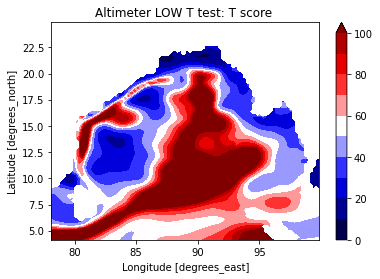

In [997]:
altimeter_low_ttest['stat'].plot.contourf(
    levels=[0,10,20,30,40,50,60,70,80,90,100],cmap='seismic')
plt.title('Altimeter LOW T test: T score ')
plt.savefig('altimeter_low_t_score.jpg',dpi=150)

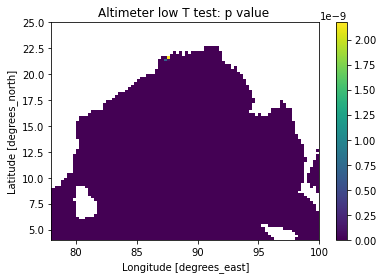

In [998]:
altimeter_low_ttest['p_val'].plot()
plt.title('Altimeter low T test: p value ')
plt.savefig('altimeter_low_p_value.jpg',dpi=150)

## LCS model

In [1019]:
lcs_low_ttest=ttest_mean(BoB_LCSCR_low)
lcs_low_ttest

{'stat': 13.885466430230613, 'p_val': 2.4526357489225472e-43}

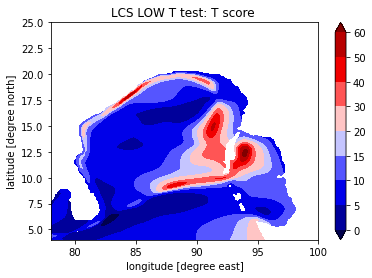

In [1000]:
lcs_low_ttest['stat'].plot.contourf(
    levels=[0,5,10,15,20,30,40,50,60],cmap='seismic')
plt.title('LCS LOW T test: T score ')
plt.savefig('lcs_low_t_score.jpg',dpi=150)

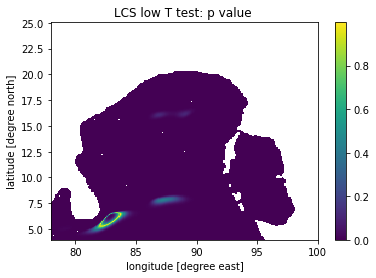

In [1001]:
lcs_low_ttest['p_val'].plot()
plt.title('LCS low T test: p value ')
plt.savefig('LCS_low_p_value.jpg',dpi=150)

In [1024]:
print("altimeter_low_ttest for two Clim"+str(altimeter_low_ttest))
print("lcs_low_ttest for two Clim"+str(lcs_low_ttest))


altimeter_low_ttest for two Clim{'stat': 111.85349126014758, 'p_val': 0.0}
lcs_low_ttest for two Clim{'stat': 13.885466430230613, 'p_val': 2.4526357489225472e-43}


# Point checking 

In [27]:
x1,y1=15,84
x2,y2=17.5,86

80°–85°E/10°–13°N, 80°–85°E/14°–16°N and 85°–90°E/17°–21°N

In [472]:
#80°–85°E/10°–13°N, 80°–85°E/14°–16°N and 85°–90°E/17°–21°N
p1

[80, 85, 10, 13]

In [1069]:
p3=[80,85,10,13]
p2=[80,85,14,16]
p1=[85,90,17,21]
season=['spring','summer','autumn','winter']
ds=['altimeter_low_decadal_ds','LCSCR_low_decadal_ds',
    'LCSBI_low_decadal_ds','LCSEIO_low_decadal_ds',
    'LCSWB_low_decadal_ds','LCSEB_low_decadal_ds',
   ]
ds_1=['_diff','_00_09_clim',"_10_19_clim"]
points=['p1','p2','p3']
hist_dataset={}
for n_3,i_3 in enumerate(points):
    hist_dataset[i_3]={}
    for n_2,i_2 in enumerate(season):
        hist_dataset[i_3][i_2]={}  
        for n_1,i_1 in enumerate(ds_1[1:3]):
            for n,i in enumerate(ds):
                if i in ['altimeter_low_decadal_ds','LCSCR_low_decadal_ds']:
                    name=eval(i)[i_2+i_1]
                    point=name.sel(latitude=slice(eval(i_3)[2],eval(i_3)[3]),longitude=slice(eval(i_3)[0],eval(i_3)[1])).mean(dim='latitude').mean(dim='longitude')
                    data_name=i[:10]+i_1[1:6]
                    hist_dataset[i_3][i_2][data_name]=float("{:.2f}".format(eval(str(point.values))))
        for n_1,i_1 in enumerate(ds_1[0:1]):
            for n,i in enumerate(ds):
                name=eval(i)[i_2+i_1]
                point=name.sel(latitude=slice(eval(i_3)[2],eval(i_3)[3]),longitude=slice(eval(i_3)[0],eval(i_3)[1])).mean(dim='latitude').mean(dim='longitude')
                data_name=i[:10]+i_1[1:6]
                hist_dataset[i_3][i_2][data_name]=float("{:.2f}".format(eval(str(point.values))))
                
point1=pd.DataFrame(hist_dataset['p1']).T
point2=pd.DataFrame(hist_dataset['p2']).T
point3=pd.DataFrame(hist_dataset['p3']).T


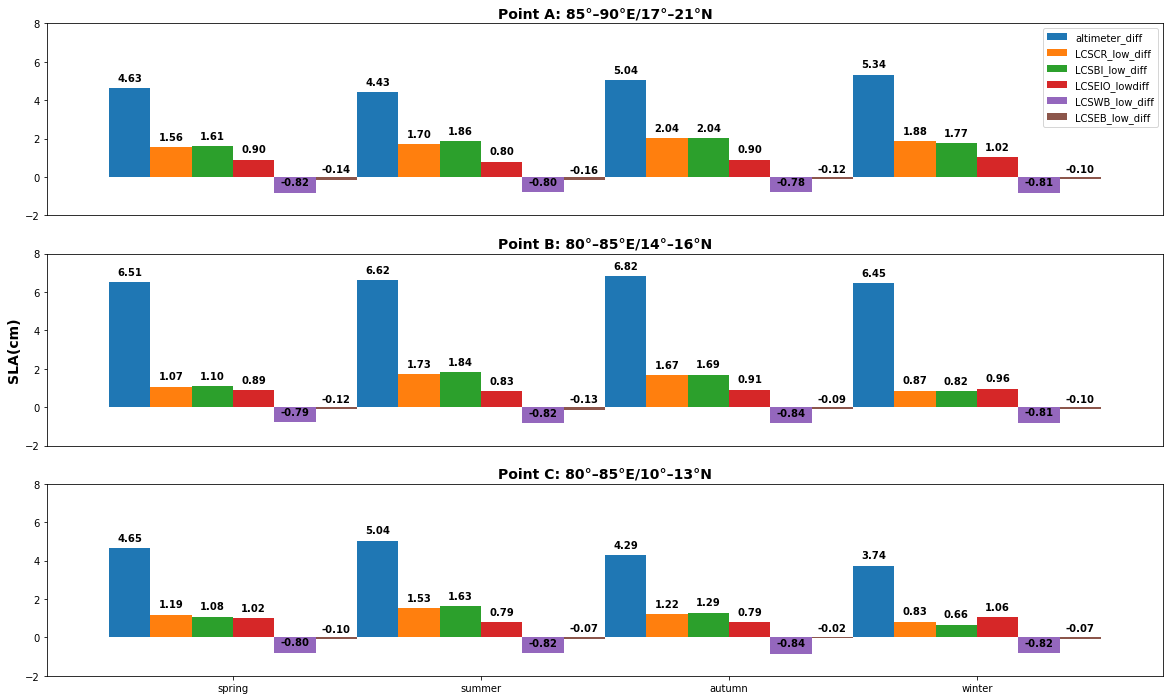

In [1107]:
points=[point1.iloc[:,4:],point2.iloc[:,4:],point3.iloc[:,4:]]
titles=['Point A: 85°–90°E/17°–21°N','Point B: 80°–85°E/14°–16°N','Point C: 80°–85°E/10°–13°N',]
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(20,12))


for i,j in enumerate(points):
    j.plot(ax=axes[i],kind='bar',width=1,rot=0,ylim=(-2,8))
    
    if i in [1,2]:
        axes[i].get_legend().remove()
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].set_title(titles[i],fontsize = 14, fontweight ='bold')
    #axes[i].xlabel( fontsize=18)
    for p in axes[i].patches:
        #axes[0].annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
        axes[i].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10),fontweight ='bold', textcoords='offset points')

axes[1].set_ylabel("SLA(cm)",fontsize = 14,fontweight ='bold') #fontweight ='bold')
axes[2].axes.get_xaxis().set_visible(True)
    

plt.savefig('point_comparison.jpg',dpi=150)

## Values of Point A, B, C Table

In [1096]:
print("Point A: 85°–90°E/17°–21°N")
point1

Point A: 85°–90°E/17°–21°N


,altimeter_00_09,LCSCR_low_00_09,altimeter_10_19,LCSCR_low_10_19,altimeter_diff,LCSCR_low_diff,LCSBI_low_diff,LCSEIO_lowdiff,LCSWB_low_diff,LCSEB_low_diff
spring,-2.45,0.96,2.18,2.52,4.63,1.56,1.61,0.90,-0.82,-0.14
summer,-2.54,-0.70,1.89,1.00,4.43,1.70,1.86,0.80,-0.80,-0.16
autumn,-2.33,-2.56,2.71,-0.51,5.04,2.04,2.04,0.90,-0.78,-0.12
winter,-2.33,-0.90,3.01,0.98,5.34,1.88,1.77,1.02,-0.81,-0.10


In [1097]:
print("Point B: 80°–85°E/14°–16°N")
point2

Point B: 80°–85°E/14°–16°N


,altimeter_00_09,LCSCR_low_00_09,altimeter_10_19,LCSCR_low_10_19,altimeter_diff,LCSCR_low_diff,LCSBI_low_diff,LCSEIO_lowdiff,LCSWB_low_diff,LCSEB_low_diff
spring,-2.10,1.15,4.42,2.22,6.51,1.07,1.10,0.89,-0.79,-0.12
summer,-2.92,-0.69,3.71,1.04,6.62,1.73,1.84,0.83,-0.82,-0.13
autumn,-4.29,-2.45,2.53,-0.78,6.82,1.67,1.69,0.91,-0.84,-0.09
winter,-3.44,-0.52,3.00,0.35,6.45,0.87,0.82,0.96,-0.81,-0.10


In [1098]:
print("Point C: 80°–85°E/10°–13°N")
point3

Point C: 80°–85°E/10°–13°N


,altimeter_00_09,LCSCR_low_00_09,altimeter_10_19,LCSCR_low_10_19,altimeter_diff,LCSCR_low_diff,LCSBI_low_diff,LCSEIO_lowdiff,LCSWB_low_diff,LCSEB_low_diff
spring,-0.19,1.28,4.45,2.47,4.65,1.19,1.08,1.02,-0.80,-0.10
summer,-2.27,-0.93,2.77,0.61,5.04,1.53,1.63,0.79,-0.82,-0.07
autumn,-4.14,-2.37,0.15,-1.15,4.29,1.22,1.29,0.79,-0.84,-0.02
winter,-2.08,-0.14,1.66,0.69,3.74,0.83,0.66,1.06,-0.82,-0.07


In [1038]:
LCSCR_low_decadal_ds['spring_00_09_clim']

<xarray.DataArray (latitude: 211, longitude: 221)>
array([[-0.30143864, -0.31115465, -0.32092293, ...,         nan,
                nan,         nan],
       [-0.28687684, -0.29849095, -0.31025875, ...,         nan,
                nan,         nan],
       [-0.26036189, -0.27359025, -0.28720645, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * latitude   (latitude) float32 4.0 4.1 4.2 4.3 4.4 ... 24.7 24.8 24.9 25.0
  * longitude  (longitude) float32 78.0 78.1 78.2 78.3 ... 99.7 99.8 99.9 100.0

In [ ]:
BoB_altimeter